100


/tmp/ipykernel_151669/1124715166.py:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_nodes = random.sample(G.nodes(), init_infected)


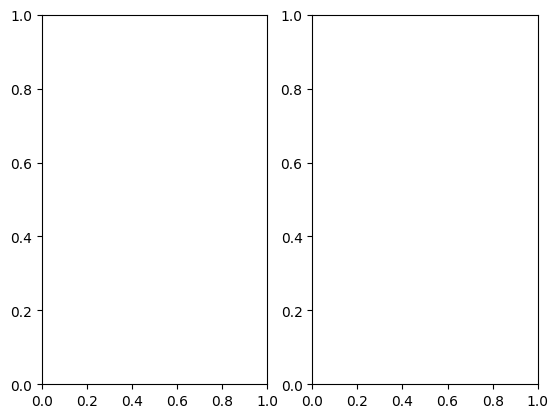

In [1]:
import networkx as nx
import random
from common_utils import plt_metrics
from metrics_util import df_to_md

def initialize_network(num_node, init_infected):
    """
    Initialize a network using the Watts-Strogatz model and set initial conditions.

    Parameters:
    num_node (int): The number of nodes in the network.
    init_infected (int): The number of initially infected nodes.

    Returns:
    tuple: A tuple containing the initialized network (G) and node positions (pos).

    The function creates a Watts-Strogatz graph with num_node nodes, each connected to 3 nearest neighbors,
    and rewiring probability 0.5. It then sets the initial state of all nodes to 'S' (susceptible) and
    randomly selects init_infected nodes to be infected ('I'). The function also generates random positions
    for the nodes using the random_layout function from NetworkX.
    """
    G = nx.watts_strogatz_graph(num_node, 3, 0.5)
    for node in G.nodes:
        G.nodes[node]['state'] = 'S'
    initial_infected_nodes = random.sample(G.nodes(), init_infected)
    for node in initial_infected_nodes:
        G.nodes[node]['state'] = 'I'
    pos = nx.random_layout(G)
    return G, pos


# noinspection t
def simulate_infection(G, infection_probability, recovery_probability, perm_immune_probability):
    """
    Simulates the spread of infection in a network using the SIRS model.

    Parameters:
    G (nx.Graph): The network graph where nodes represent individuals and edges represent connections.
                  Each node must have a 'state' attribute representing its current state ('S', 'I', 'R', 'P').
    infection_probability (float): The probability of infection for a susceptible neighbor of an infected node.
    recovery_probability (float): The probability of recovery for an infected node.
    perm_immune_probability (float): The probability of becoming permanently immune for a susceptible node.

    Returns:
    None. The function modifies the 'state' attribute of nodes in the network graph.
    """
    new_infected = set()
    new_recovered = []
    for node in G.nodes:
        if G.nodes[node]['state'] == 'I':
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['state'] == 'S' and random.random() < infection_probability:
                    G.nodes[neighbor]['state'] = 'I'
            if random.random() < recovery_probability:
                new_recovered.append(node)
    for node in new_infected:
        G.nodes[node]['state'] = 'I'

    for node in new_recovered:
        G.nodes[node]['state'] = 'R'

    for node in G.nodes:
        if G.nodes[node]['state'] == 'S' and random.random() < perm_immune_probability:
            G.nodes[node]['state'] = 'P'



def count_states(G):
    susceptible_count = sum(G.nodes[node]['state'] == 'S' for node in G.nodes)
    infected_count = sum(G.nodes[node]['state'] == 'I' for node in G.nodes)
    recovered_count = sum(G.nodes[node]['state'] == 'R' for node in G.nodes)
    perm_immune_count = sum(G.nodes[node]['state'] == 'P' for node in G.nodes)
    return susceptible_count, infected_count, recovered_count, perm_immune_count


def watts_strogatz_model(num_nodes, initial_infected, infection_probability, recovery_probability, perm_immune_probability, timesteps):
    """
    Simulates the spread of infection in a network using the SIRS model and the Watts-Strogatz model for network initialization.

    Parameters:
    num_nodes (int): The total number of nodes in the network.
    initial_infected (int): The number of nodes initially infected.
    infection_probability (float): The probability of infection for a susceptible neighbor of an infected node.
    recovery_probability (float): The probability of recovery for an infected node.
    perm_immune_probability (float): The probability of becoming permanently immune for a susceptible node.
    timesteps (int): The number of time steps to simulate.

    Returns:
    None. The function modifies the state of nodes in the network graph and generates plots of the simulation metrics.
    """
    G, pos = initialize_network(num_nodes, initial_infected)
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []
    perm_immune_counts = []
    for t in range(timesteps):
        simulate_infection(G, infection_probability, recovery_probability, perm_immune_probability)
        susceptible_count, infected_count, recovered_count, perm_immune_count = count_states(G)
        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        recovered_counts.append(recovered_count)
        perm_immune_counts.append(perm_immune_count)
        plt_metrics(susceptible_counts, infected_counts, recovered_counts, perm_immune_counts, G, pos, t)
    return G

if __name__ == "__main__":
    num_nodes = 1000
    initial_infected = 20
    infection_probability = 0.4
    recovery_probability = 0.1
    perm_immune_probability = 0.05
    timesteps = 20
    G, pos = initialize_network(num_nodes, initial_infected)

In [2]:
df_to_md(G)